---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 1 </font></div>
## <div align="center"> <font color='red'> Student Name:  Devmi Shalini Perera Attapattuge                            </font></div>
## <div align="center"> <font color='red'> Student number:  s4073541                         </font></div>
## <div align="center"> <font color='red'> Student Name:  Vishini Harithya Bodi Hennedi                          </font></div>
## <div align="center"> <font color='red'> Student number:  s4072225                     </font></div>
---

# Problem statement

your problme statement goes here



## Data Splitting, and EDA

 explain why you split your Data
 wxplain your EDA and what each step represents



In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image
warnings.filterwarnings('ignore')


In [7]:
with zipfile.ZipFile('./Image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [81]:
#loading and combining datasets
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

#combined only to be used in cancer detection
combined_data = pd.concat([main_data,extra_data],axis = 0)

In [83]:
base_dir = 'patch_images/'
combined_data['ImagePath'] = combined_data['ImageName'].apply(lambda x : base_dir + x)
combined_data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,ImagePath
0,22405,1,22405.png,fibroblast,0.0,0,patch_images/22405.png
1,22406,1,22406.png,fibroblast,0.0,0,patch_images/22406.png
2,22407,1,22407.png,fibroblast,0.0,0,patch_images/22407.png
3,22408,1,22408.png,fibroblast,0.0,0,patch_images/22408.png
4,22409,1,22409.png,fibroblast,0.0,0,patch_images/22409.png


## Exploratory Data Analysis (EDA)

In [23]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [25]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [27]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20280 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InstanceID    20280 non-null  int64  
 1   patientID     20280 non-null  int64  
 2   ImageName     20280 non-null  object 
 3   cellTypeName  9896 non-null   object 
 4   cellType      9896 non-null   float64
 5   isCancerous   20280 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [71]:
print('No of patients in the entire dataset: {}'.format(len(combined_data['patientID'].unique())))

No of patients in the entire dataset: 98


# Write about the total dataset no of records in each dataset (main, extra and combined) and write about the No of patients in the whole dataset

### Data Distribution - Cell Type

In [73]:
## This functions plots the class distribution graphs.

def plot_class_distribution(df, column, title, color="skyblue"):
 
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Calculate class distribution
    class_dist = df[column].value_counts(normalize=True) * 100
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    class_dist.plot(kind='bar', color=color, ax=ax)

    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

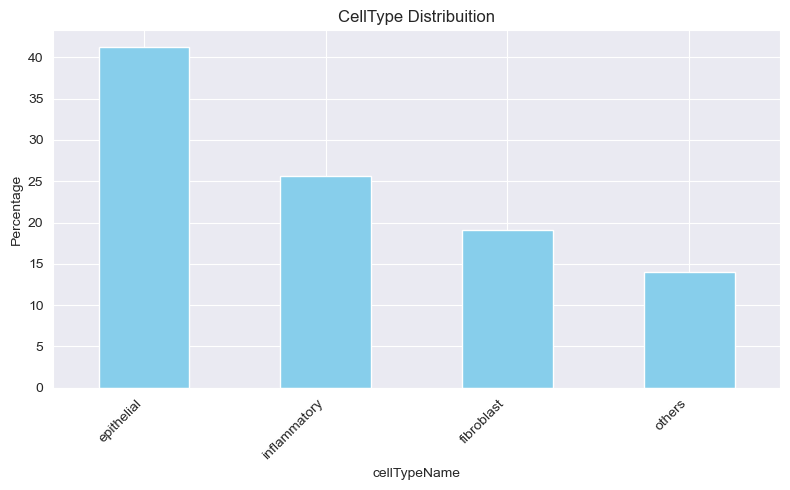

In [77]:
# cell type distribution
plot_class_distribution(combined_data, 'cellTypeName', "CellType Distribuition", color="skyblue")

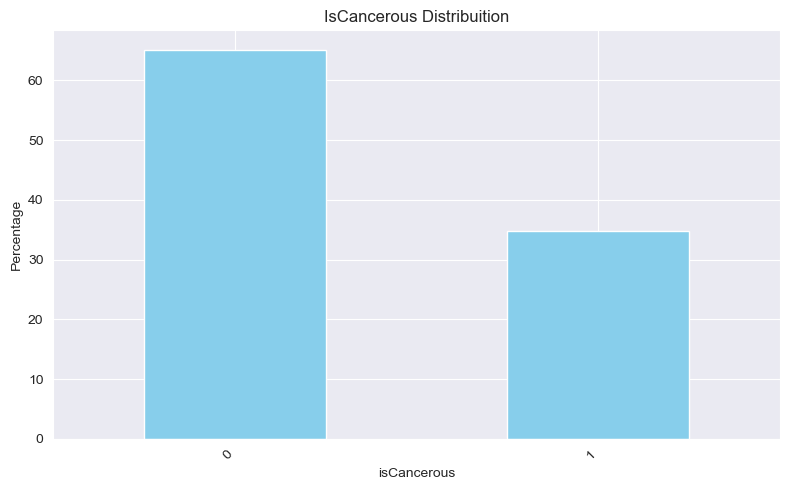

In [79]:
# IsCancer distribution
plot_class_distribution(combined_data, 'isCancerous', "IsCancerous Distribuition", color="skyblue")

## Class Imbalance Identification
### Write about the distribution and also mention multi-class classifier as there are multiple (4) classes for classification
### Write about the the distribuition and also mention binary classification as there are only 2 classes for classification. 

In [85]:
fibroblast, inflammatory, epithelial, others = [combined_data[combined_data['cellType'] == i].sample(4) for i in range(4)]


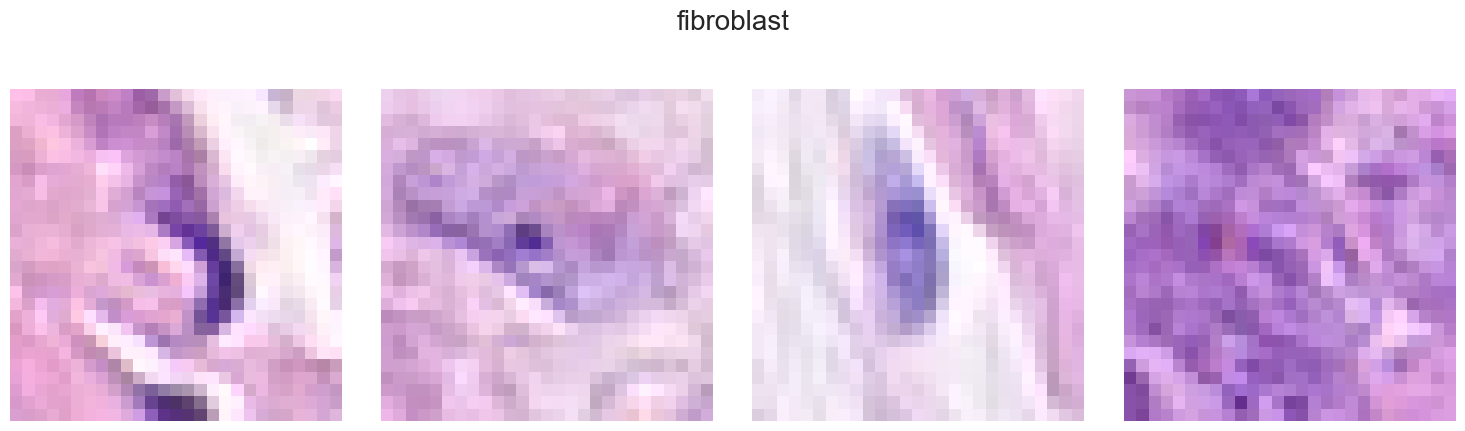

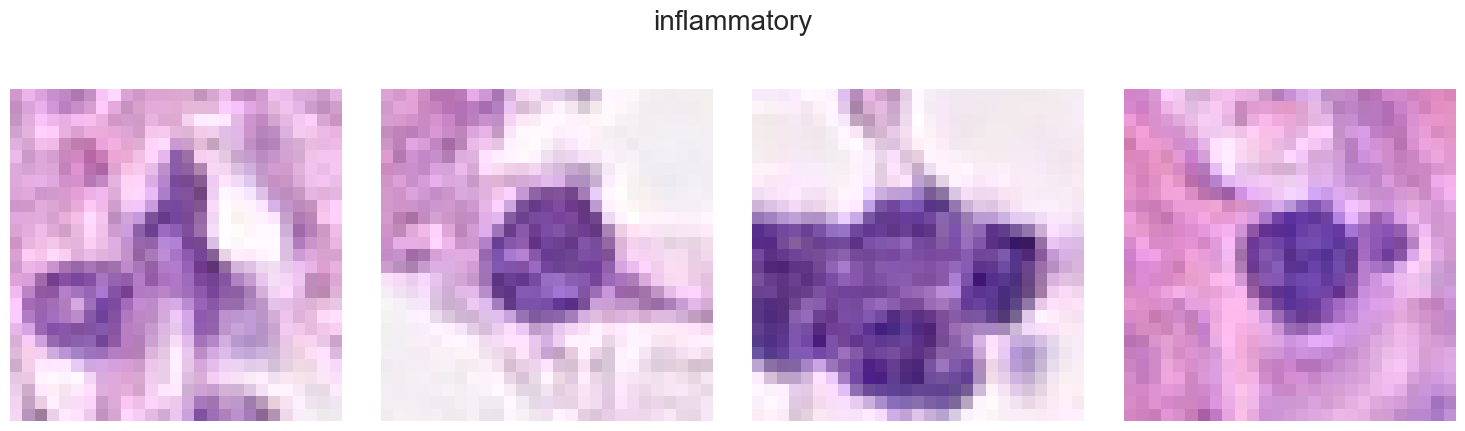

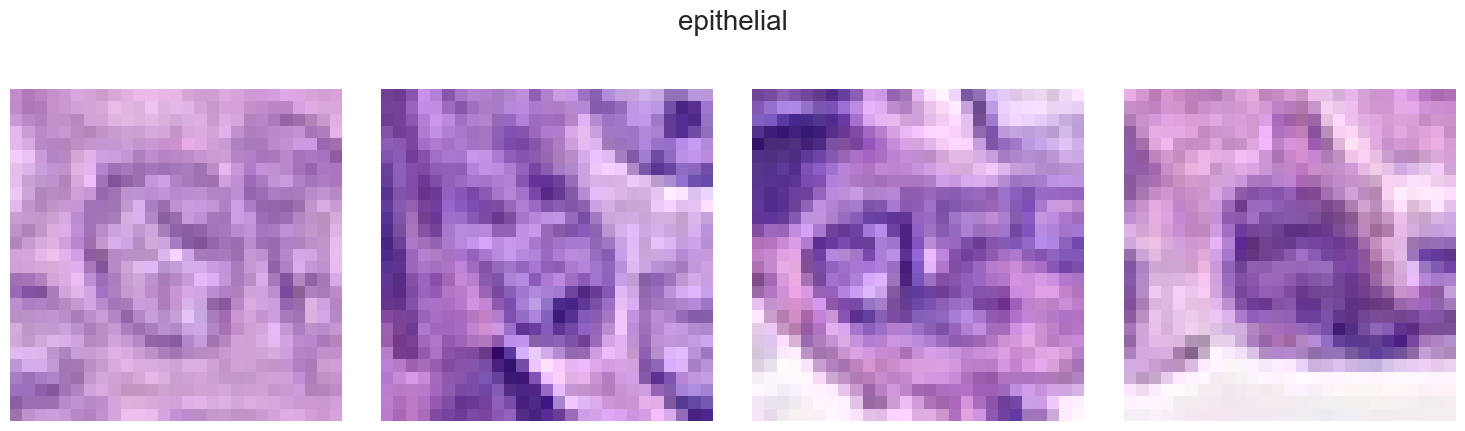

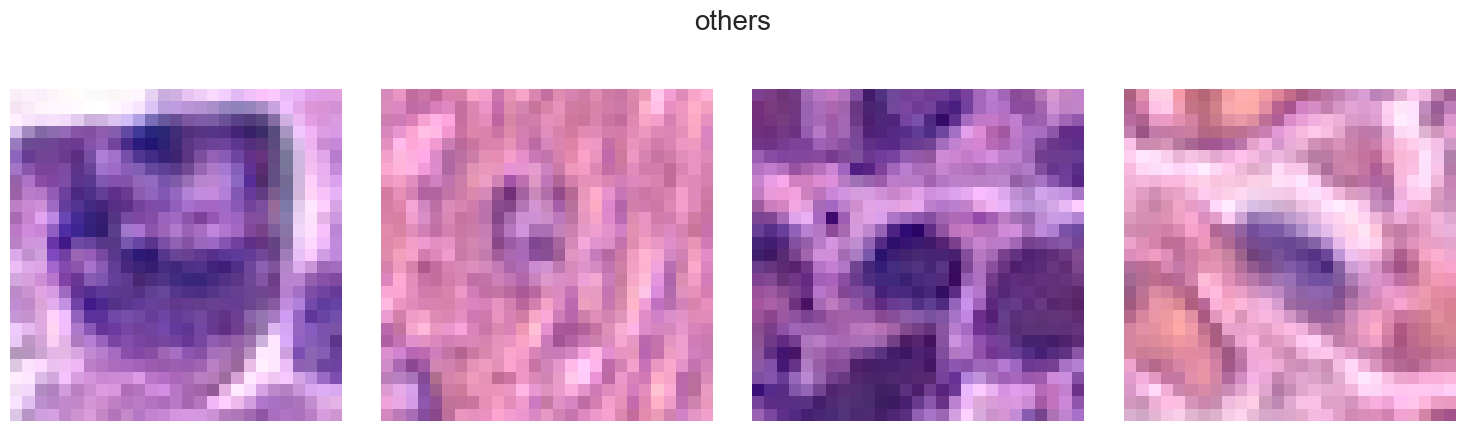

In [93]:
def plot_images(df,title):
  fig = plt.figure(figsize = (15,8))
  for i, img in enumerate(df):
    fig.add_subplot(2,4,i+1)
    plt.imshow(Image.open(img))
    plt.axis('off')
    fig.suptitle(title, fontsize = 20) 
  plt.tight_layout(rect = [0, 0.03, 1, 0.95])
  return plt.show()
img_labels = [fibroblast,inflammatory,epithelial,others]
for labels in img_labels:
  label = str(labels['cellTypeName'].iloc[0])
  plot_images(labels['ImagePath'],label)



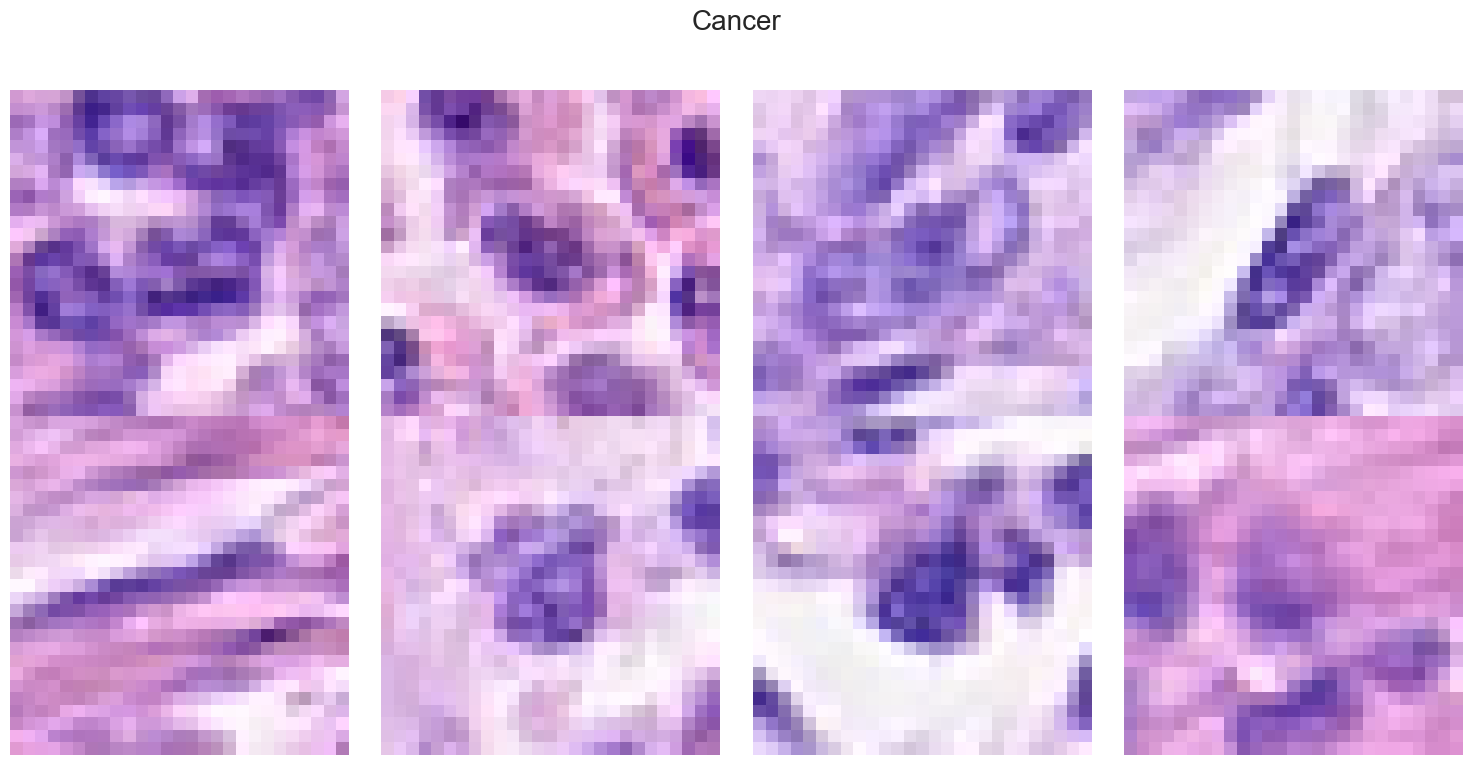

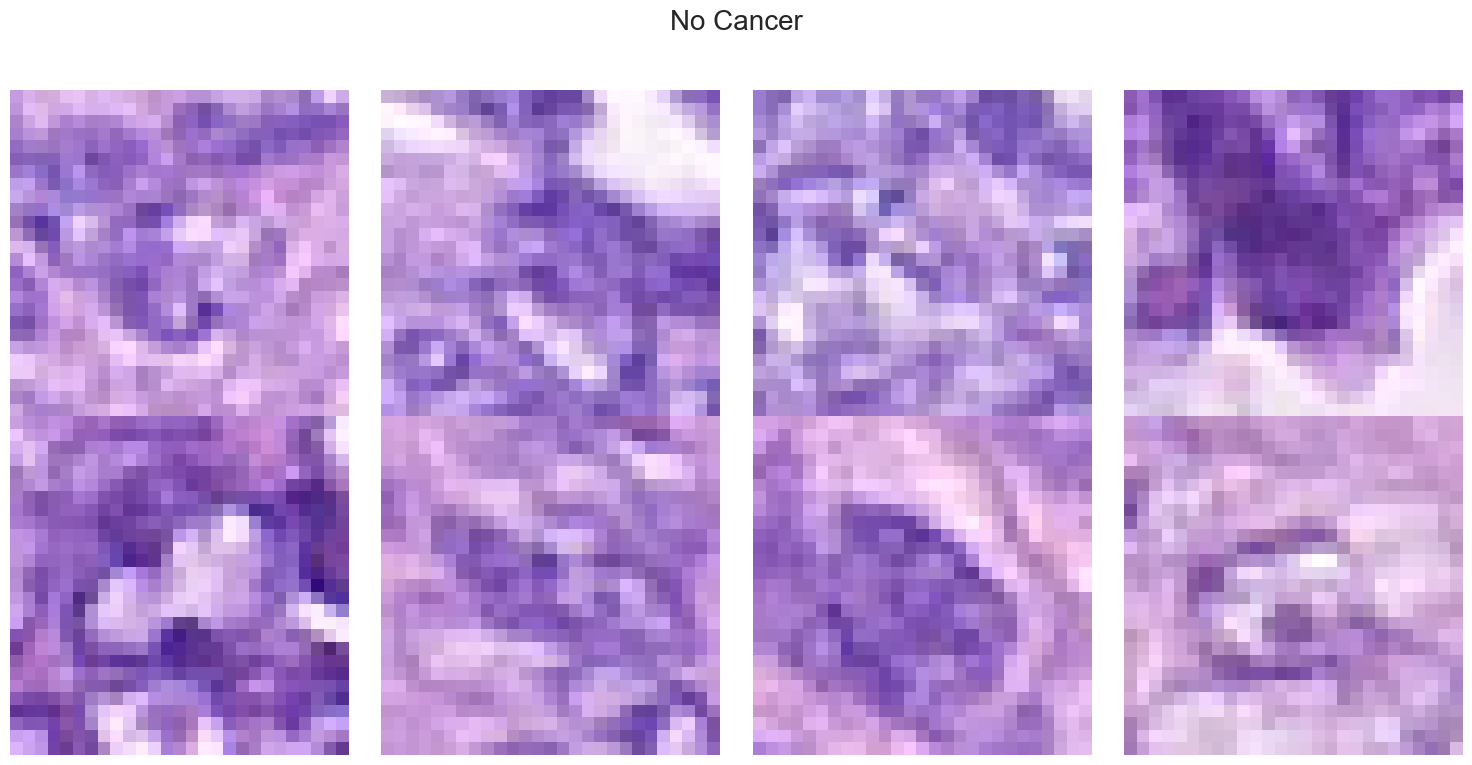

In [97]:
cancer = combined_data.loc[combined_data['isCancerous']==1].sample(8)
not_cancer = combined_data.loc[combined_data['isCancerous']==0].sample(8)

isCancerous = [not_cancer,cancer]
can_label  = ['Cancer','No Cancer']
for i, labels in enumerate(isCancerous):
  plot_images(labels['ImagePath'],can_label[i])

# Exploratory Data Analysis (2 marks): Provides visual samples from the dataset and identifies

potential issues (e.g., occlusion, blur, embedded text)

Image Analysis - blur therefore by using image geenrator the images will be scaled down 

## Data Splitting

In [55]:
def split_data(data):

    # Step 1: Split based on unique patient IDs for train and test
    unique_patients = data['patientID'].unique()
    
    # First split: 80% train_val, 20% test
    train_val_patients, test_patients = train_test_split(
        unique_patients, test_size=0.2, random_state=42
    )
    
    # Filter the full dataset based on patient IDs
    train_val_data = data[data['patientID'].isin(train_val_patients)]
    test_data = data[data['patientID'].isin(test_patients)]
    
    # Step 2: From train_val, split 80% train, 20% validation
    train_patients, val_patients = train_test_split(
        train_val_patients, test_size=0.2, random_state=42
    )
    
    train_data = data[data['patientID'].isin(train_patients)]
    val_data = combined_data[combined_data['patientID'].isin(val_patients)]
     
    
    print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))
    return test_data, train_data,val_data

In [57]:
#split_data_for_cancer_classifier
test_data_cancer,train_data_cancer,val_data_cancer=split_data(combined_data)
#total number of records in each dataset equals the  main_data+extra_data.


Train data : 12319, Val Data: 4005, Test Data: 3956


In [59]:
#split_data_for_cell_type_classifier_full_supervised
test_data_cell,train_data_cell,val_data_cell=split_data(main_data)


Train data : 6215, Val Data: 1842, Test Data: 1839


In [63]:
def check_data_leakages(train_data,val_data,test_data):
    # Check for data leakages
    # Patient Ids should be uniqye in the 3 seperate datasets. Patient Ids cannot be overlapped between the datasets
    # Get sets of patient IDs in each split
    train_patients_set = set(train_data['patientID'])
    val_patients_set = set(val_data['patientID'])
    test_patients_set = set(test_data['patientID'])
    
    # Check for overlaps
    leak_train_val = train_patients_set.intersection(val_patients_set)
    leak_train_test = train_patients_set.intersection(test_patients_set)
    leak_val_test = val_patients_set.intersection(test_patients_set)
    
    # Print results
    print("Patients in both train and val:", leak_train_val)
    print("Patients in both train and test:", leak_train_test)
    print("Patients in both val and test:", leak_val_test)
    
    # no data leakages. 
        

In [65]:
#checking_data_leakages_for_cancer_data_split
check_data_leakages(train_data_cancer,val_data_cancer,test_data_cancer)

Patients in both train and val: set()
Patients in both train and test: set()
Patients in both val and test: set()


In [67]:
#checking_data_leakages_for_cell_data_split
check_data_leakages(train_data_cell,val_data_cell,test_data_cell)

Patients in both train and val: set()
Patients in both train and test: set()
Patients in both val and test: set()


# Write about Data Leakage - There were no data leakages no overlapping patient ids in train/val/test datasets. Total number of records in splits = Total number of records avaialable (test+train+val= 20280)

### EDA result Analysis and deriven conclusion
Explain what you have observed from the output of your EDA


## Data Pre- Processing

Explain the step taken and why, or if you decide not to perform ore-processing then why not?

In [101]:
#Changing target variables data type to str for ImageDataGenerator
train_data_cancer['isCancerous'] = train_data_cancer['isCancerous'].astype('str')
val_data_cancer['isCancerous'] = val_data_cancer['isCancerous'].astype('str')
test_data_cancer['isCancerous'] = test_data_cancer['isCancerous'].astype('str')

train_data_cell['cellType'] = train_data_cell['cellType'].astype('str')
val_data_cell['cellType'] = val_data_cell['cellType'].astype('str')
test_data_cell['cellType'] = test_data_cell['cellType'].astype('str')

In [149]:
def image_data_generator(train_data, val_data, test_data, x_column, y_column, target_size=(27, 27), batch_size=32):
    datagen_args = dict(rescale=1./255, data_format='channels_last')
    
    train_datagen = ImageDataGenerator(**datagen_args)
    val_datagen = ImageDataGenerator(**datagen_args)
    test_datagen = ImageDataGenerator(**datagen_args)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='patch_images/',
        x_col=x_column,
        y_col=y_column,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        #shuffle=False
    )

    return train_generator, validation_generator, test_generator

In [151]:
#Images of Cancer/No cancer after processing
train_gen_can,val_gen_can,test_gen_can=image_data_generator(train_data_cancer,val_data_cancer,test_data_cancer,"ImageName","isCancerous")

Found 12319 validated image filenames belonging to 2 classes.
Found 4005 validated image filenames belonging to 2 classes.
Found 3956 validated image filenames belonging to 2 classes.


In [153]:
#Images of celltypes after processing
train_gen_cell,val_gen_cell,test_gen_cell=image_data_generator(train_data_cell,val_data_cell,test_data_cell,"ImageName","cellType")

Found 6215 validated image filenames belonging to 4 classes.
Found 1842 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


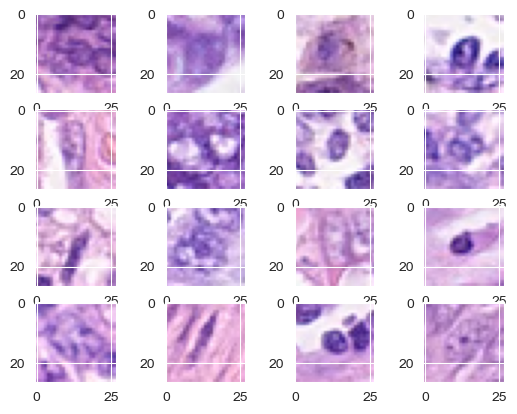

In [161]:
images, labels = next(train_gen_can)

#plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

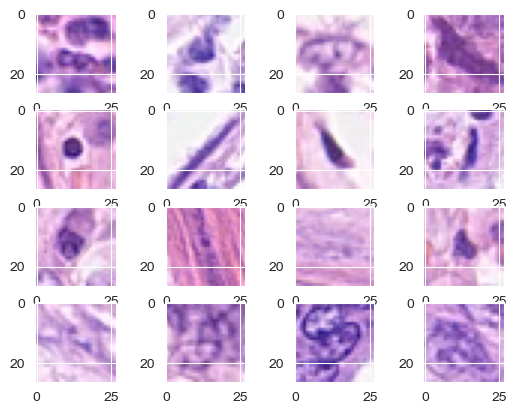

In [159]:
images, labels = next(train_gen_cell)

#plt.figure(figsize= (15, 15))
for i in range(batch_size//2):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])

plt.show()

# Write about using Image generator processing images

## Baseline development (Linear regression and Poisson Regression) 
Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning 

Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

In [ ]:
## TODO
## You need to run this code, so the output is displayed bellow


<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 


## Polynomila regression and Generalized Linear Models (if applicable)

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning
Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

In [ ]:
## TODO
## You need to run this code, so the output is displayed bellow

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 

## Single Linear or Polynomial regression with two outputs

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning

Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 

### You can add any other analysis you want with justification here (adding code and markdown)